In [98]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [99]:
def read_file(filename):
    img=cv2.imread(filename)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    #converting RED GREEN BLUE format from BLUE GREEN RED
    plt.imshow(img)
   
    plt.show()
    return img
    

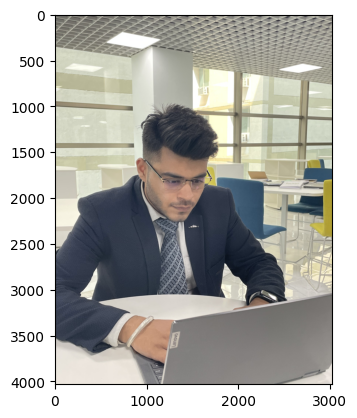

In [100]:
file_name="IMG_1401.jpg"
img=read_file(file_name)
og_image=np.copy(img)

In [101]:
#creating edge mask
def edge_mask(img,line_size,blur_value):
    """
    input:"Gray Scale Image"
    Output:"Edges of Image"
    """
    
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    gray_blur=cv2.medianBlur(gray,blur_value)
    edges=cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY,line_size,blur_value)
    return edges

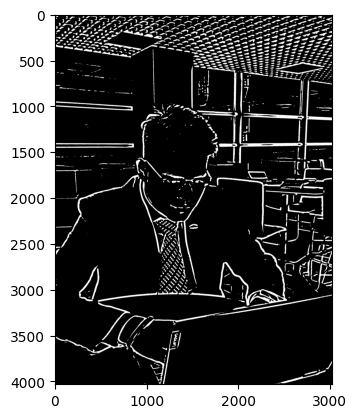

In [125]:
line_size,blur_value=43,13
edges=edge_mask(img,line_size,blur_value)
plt.imshow(edges,cmap="binary")
plt.show()

In [106]:
# reducing the color palette
def color_quantization(img,k):
    #transform the image
    data=np.float32(img).reshape((-1,3))
    #determine Criteria
    criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,20,.001)
    ## IMPLEMENTING k_means
    ret,label,center=cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center=np.uint8(center)
    result=center[label.flatten()]
    result=result.reshape(img.shape)
    return result

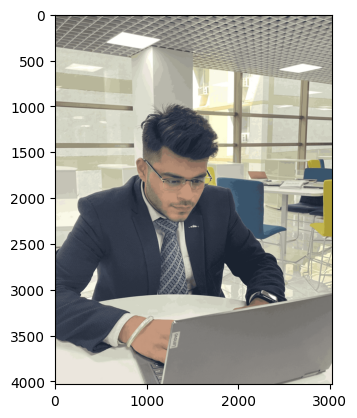

In [63]:
img=color_quantization(img,k=60)
plt.imshow(img)
plt.show()

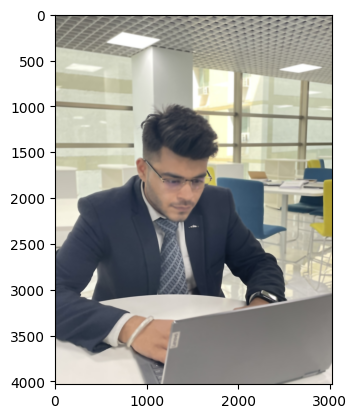

In [120]:
#Reduce the noise
blurred=cv2.bilateralFilter(img,d=25,sigmaColor=200,sigmaSpace=200)
plt.imshow(blurred)
plt.show()

combine edge_mask with the quantized_image


In [127]:
def cartoon():
    c=cv2.bitwise_and(blurred,blurred,mask=edges)
    print("cartoon_img")
    plt.imshow(c)
    plt.show()

    print("Original_Image")
    plt.imshow(og_image)
    plt.show()

cartoon_img


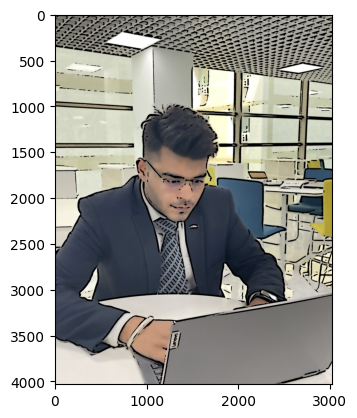

Original_Image


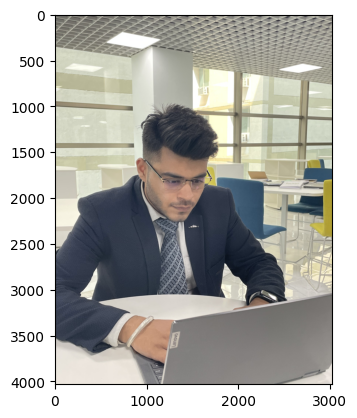

In [128]:
cartoon()